# Business Case: Yulu - Hypothesis Testing

## Business Problem Statement

__Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.__


__Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!__


__Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.__

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
from numpy import mean
import scipy.stats as stats
from scipy.stats import norm 
from scipy.stats import poisson 
from scipy.stats import  binom 
from scipy.stats import expon
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
yulu = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [4]:
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Data Exploration and Cleaning

In [5]:
yulu.shape

(10886, 12)

In [6]:
yulu.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
data_un = pd.Series({c: yulu[c].nunique() for c in yulu})
data_un

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [8]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
yulu.describe(include='object')

,datetime
count,10886
unique,10886
top,2012-06-09 12:00:00
freq,1


In [10]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
data_un = pd.Series({c: yulu[c].isnull().sum() for c in yulu})
data_un

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
yulu['datetime'] = pd.to_datetime(yulu['datetime'])
yulu['dates'] = yulu['datetime'].dt.date
yulu.drop(columns='datetime',axis=1,inplace=True)
yulu['dates'] = pd.to_datetime(yulu['dates'])
yulu['month']= yulu['dates'].dt.month_name().str[:3]
yulu['year']= yulu['dates'].dt.year
yulu['weekday'] =yulu['dates'].dt.day_name()

In [13]:
yulu.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dates,month,year,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,Jan,2011,Saturday
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,Jan,2011,Saturday
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,Jan,2011,Saturday
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,Jan,2011,Saturday
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,Jan,2011,Saturday


In [14]:
new_order = [-2,-3,-1,0,1,2,3,4,5,6,7,8,9,10]
yulu = yulu[yulu.columns[new_order]]
yulu

,year,month,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,Jan,Saturday,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011,Jan,Saturday,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011,Jan,Saturday,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011,Jan,Saturday,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011,Jan,Saturday,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,Dec,Wednesday,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012,Dec,Wednesday,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012,Dec,Wednesday,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012,Dec,Wednesday,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [16]:
yulu['weather'].replace({1:'clear clouds',2:'misty',3:'light snowy',4:'heavy rain'},inplace=True)
yulu['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
yulu['holiday'].replace({0:'no holiday',1:'holiday'},inplace=True)
yulu['workingday'].replace({1:'weekdays',0:'weekend/holiday'},inplace=True)

In [17]:
yulu.head()

,year,month,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,Jan,Saturday,spring,no holiday,weekend/holiday,clear clouds,9.84,14.395,81,0.0,3,13,16
1,2011,Jan,Saturday,spring,no holiday,weekend/holiday,clear clouds,9.02,13.635,80,0.0,8,32,40
2,2011,Jan,Saturday,spring,no holiday,weekend/holiday,clear clouds,9.02,13.635,80,0.0,5,27,32
3,2011,Jan,Saturday,spring,no holiday,weekend/holiday,clear clouds,9.84,14.395,75,0.0,3,10,13
4,2011,Jan,Saturday,spring,no holiday,weekend/holiday,clear clouds,9.84,14.395,75,0.0,0,1,1


# Exploratory Data Analysis

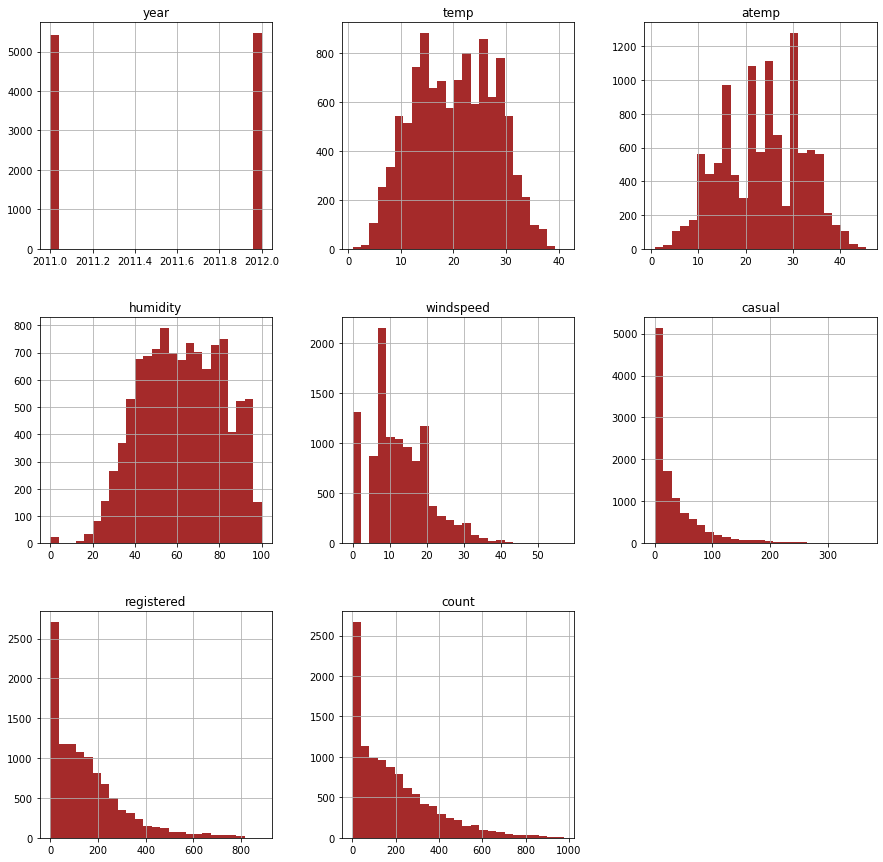

In [19]:
yulu.hist(color='brown',figsize=(15,15),bins=25)
plt.show()

*__Observations__*:-

    -- The dataset has the data of about 788 days from the year 2011 and 2012.
    -- The distribution of weekdays and weekends across the data is equal.
    -- Most of the temprature is recorded between 10 to 30 degrees.
    -- Majority of the humidity is recorded between 10 to 30.
    -- The majority of windspeed was around 10.
    -- Casual and registered customers follow the same trend.

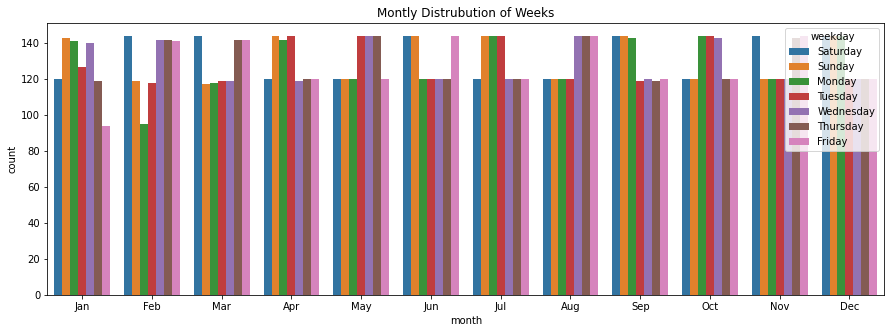

In [21]:
# count of customers in all the weeks during the time
plt.figure(figsize=(15,5))
sns.countplot(x=yulu['month'],hue=yulu['weekday'])
plt.title('Montly Distrubution of Weeks')
plt.show()

*__Observation__*:-

    -- It can be observed that every month, at least 3 or 4 days of the week had equal customers except Jan.
    -- Probability of renting a Yulu vehicles on a Monday is higher in Feb, Mar, Jun, Sept, Nov and Dec.
    -- Probability of renting a Yulu vehicles on a Tuesday is higher in Jan, Apr, June, July, Sept and Dec.
    -- Probability of renting a Yulu vehicles on a Wednesday is higher in Jan,Apr, July, Sept, Oct, and Dec.
    -- Probability of renting a Yulu vehicles on a Thursday is higher in Apr, May, July ans Oct.
    -- Probability of renting a Yulu vehicles on a Friday is higher in Jan, Feb, May, Aug and Oct.
    -- Probability of renting a Yulu vehicles on a Saturday is higher in Feb, Mar, May, and Aug.
    -- Probability of renting a Yulu vehicles on s Sunday is higher in Feb, Mar, June, Aug, and Nov.

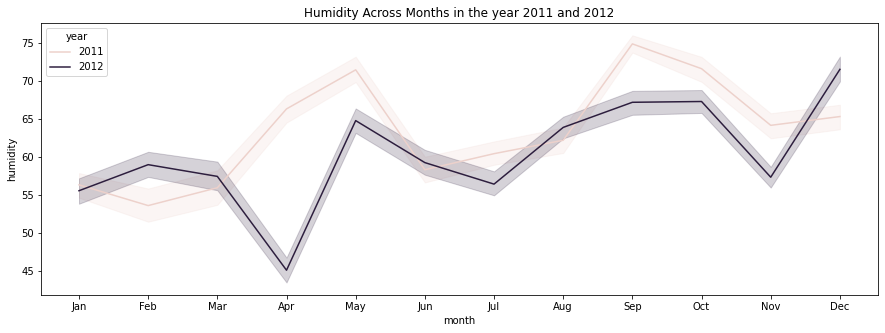

In [22]:
#  humidity across months in years
plt.figure(figsize=(15,5))
sns.lineplot(x=yulu['month'],y=yulu['humidity'],hue=yulu['year'])
plt.title('Humidity Across Months in the year 2011 and 2012')
plt.show()

*__Observations__*:
    
    - Humidity in both the years fall during Oct- Nov.
    - The humidty rises during 2011 from Mar-May while in 2012, humidity falls during Mar-Arp and then rises.

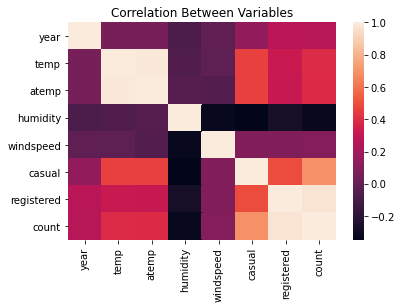

In [23]:
# correlation between variables of the dataset
x = yulu.corr()
sns.heatmap(data=x)
plt.title('Correlation Between Variables')
plt.show()

*__Observations__*:-
    
    - Casual users decreases at workingdays.
    - Casual users decreases as humidity increases.
    - Casual users increases as atemp increases.
    - Casual users increases as temp increases.
    - Registered users decreases as humidity increases.
    - Count of users slightly decreases as weather increases.
    - Count of users increases as atemp increases.
    - Count of users increases as temp increases.
    - Registered users increases as casual users increases.

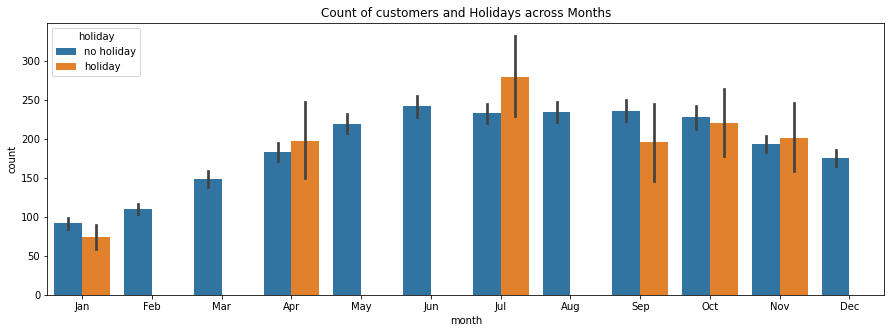

In [25]:
# count of customers on holidays across months
plt.figure(figsize=(15,5))
sns.barplot(x=yulu['month'],y=yulu['count'],hue=yulu['holiday'])
plt.title('Count of customers and Holidays across Months')
plt.show()

*__Observations__*:-

    -- June, December, February, May, August and  March does not have holidays.
    -- April, November and July have more holidays than no holidays.
    -- July holds the most holidays yet has the most no. of customers.
    -- The distribution of customers in June, July, August and September on holidays is almost the same.
    -- At the bigenning and end of the year, holidays n no. of customers decrease.

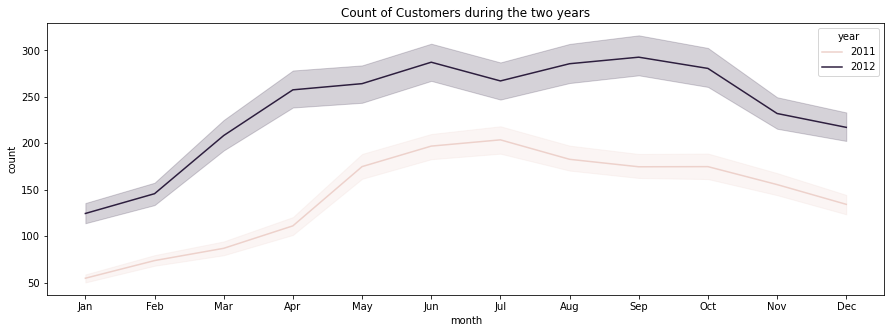

In [27]:
# count of customers during the two years
plt.figure(figsize=(15,5))
sns.lineplot(x=yulu['month'],y=yulu['count'],hue=yulu['year'])
plt.title('Count of Customers during the two years')
plt.show()

*__Observations__*:-

    - Both the year follows almost the same tredn at the beginning yet 2012 starts with a  increase in numbers.
    - The customers in 2012 are increasing drastically during july to Oct while the cistomers in 2011 are drastically decresing     in 2011.
    - Customers in 2012 jun-july were drastically decresing while the same period in 2011 was significantly increasing.

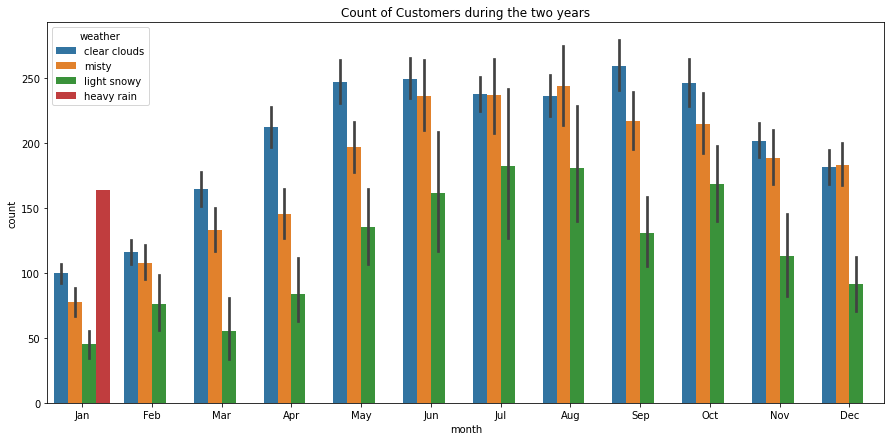

In [28]:
# weather during the months
plt.figure(figsize=(15,7))
sns.barplot(x=yulu['month'],y=yulu['count'],hue=yulu['weather'])
plt.title('Count of Customers during the two years')
plt.show()

*__Observations__*:

    -- Heavy rain weather can only be observed in Jan
    -- From May to August, clear clouds weather retain almost the equal amount of customers.
    -- The starting of the year as well as the end of the year observes less customer.    
    -- More customers were interested in Yulu vehicles during clear clouds weather.

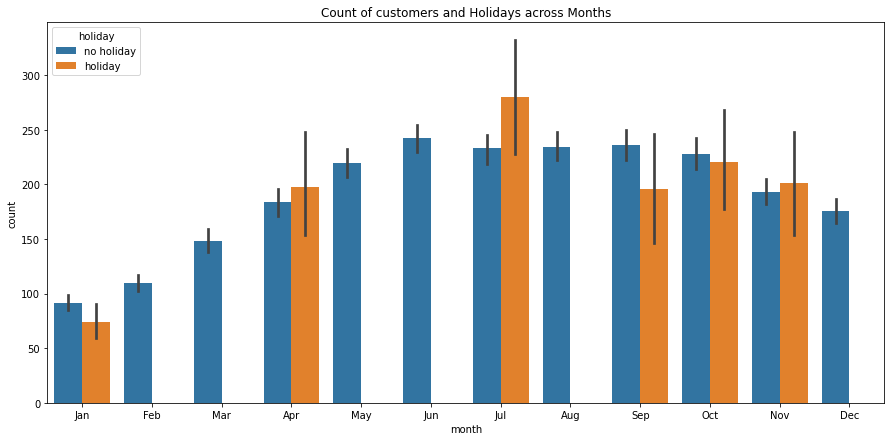

In [29]:
# count of customers on holidays across months
plt.figure(figsize=(15,7))
sns.barplot(x=yulu['month'],y=yulu['count'],hue=yulu['holiday'])
plt.title('Count of customers and Holidays across Months')
plt.show()

In [30]:
weather = yulu.groupby('weather').nunique().reset_index()
# weather_df = weather_df[['weather','count','registered','casual']]
weather = weather[['weather','casual','registered']]
weather

,weather,casual,registered
0,clear clouds,295,689
1,heavy rain,1,1
2,light snowy,107,274
3,misty,202,520


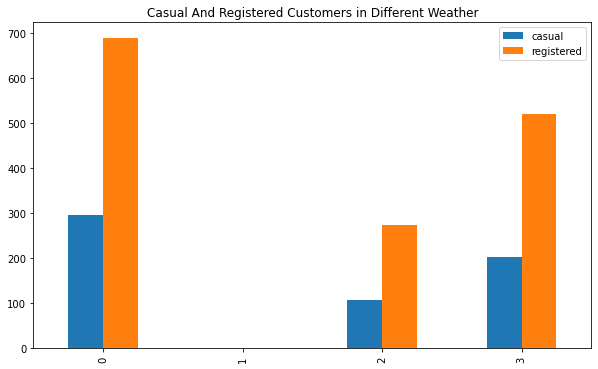

In [31]:
weather.plot.bar(figsize=(10,6))
plt.title('Casual And Registered Customers in Different Weather')
plt.show()

*__Observation__*:-

    -- During all the weather, the registered customers were more than double of the casual customers.
    -- Heavy rain weather sees equal casual and registered customers that is 1.

In [35]:
season = yulu.groupby('season').nunique().reset_index()
season = season[['season','casual','registered']]
season

,season,casual,registered
0,fall,248,576
1,spring,149,413
2,summer,257,554
3,winter,203,542


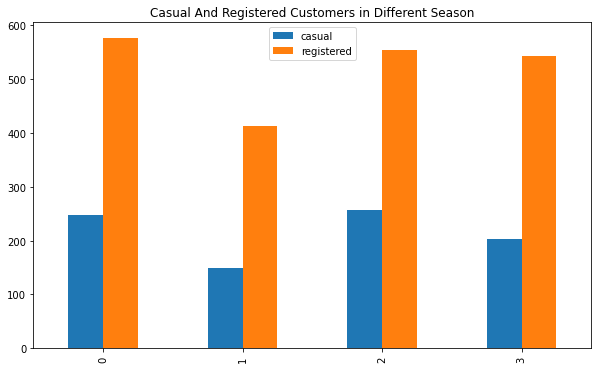

In [36]:
season.plot.bar(figsize=(10,6))
plt.title('Casual And Registered Customers in Different Season')
plt.show()

*__Observation__*:-

    -- In every season, registered customers are of more than the doublt of casual customers in that particular season.
    -- Summer season has less no. of casual customers as well as less no. of registered customers.

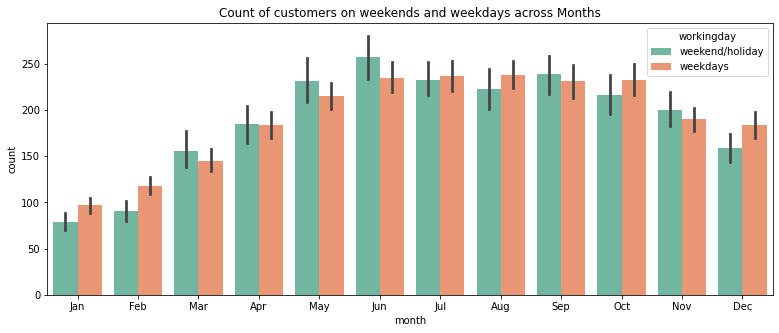

In [37]:
plt.figure(figsize=(13,5))
sns.barplot(x=yulu['month'],y=yulu['count'],hue=yulu['workingday'],palette='Set2')
plt.title('Count of customers on weekends and weekdays across Months')
plt.show()

*__Observations__*:-

    - June to Oct have almost the same no. of customers during weekdays.
    - Both the starting and the end of the data shows lesser customers and they have less weekends or holidays too.
    - April is the only month who records the equal no. of customers 

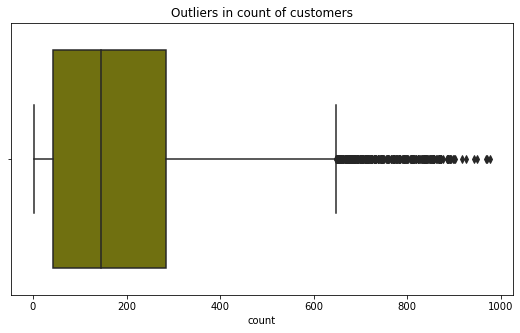

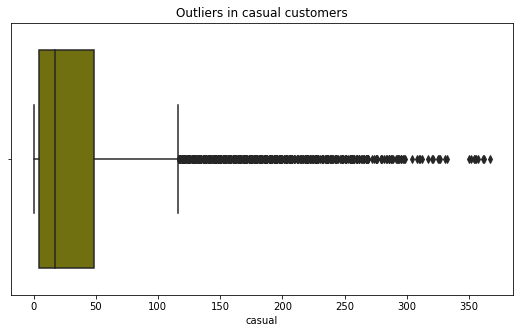

In [61]:
# outliers in the dataset

plt.figure(figsize=(9,5))
sns.boxplot(x=yulu['count'],color='olive')
plt.title('Outliers in count of customers')
plt.show()

plt.figure(figsize=(9,5))
sns.boxplot(x=yulu['casual'],color='olive')
plt.title('Outliers in casual customers')
plt.show()



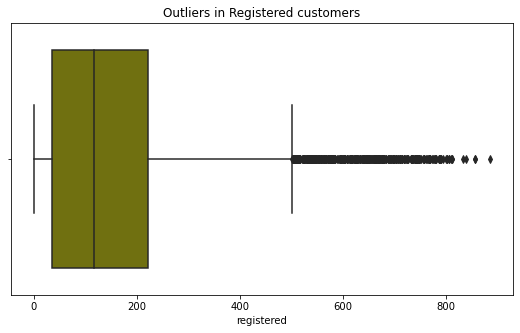

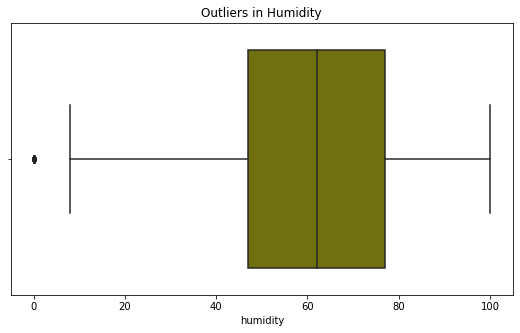

In [62]:
plt.figure(figsize=(9,5))
sns.boxplot(x=yulu['registered'],color='olive')
plt.title('Outliers in Registered customers')
plt.show()

plt.figure(figsize=(9,5))
sns.boxplot(x=yulu['humidity'],color='olive')
plt.title('Outliers in Humidity')
plt.show()



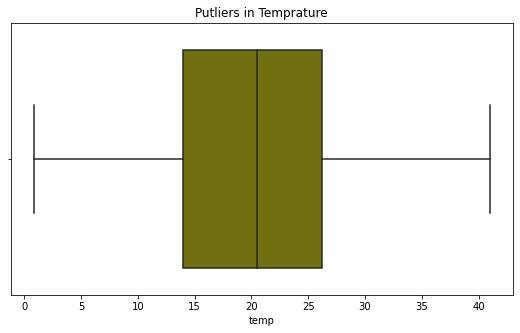

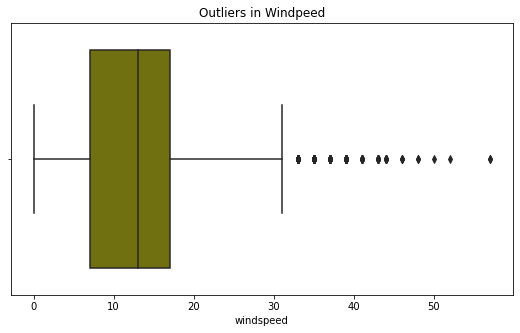

In [63]:
plt.figure(figsize=(9,5))
sns.boxplot(x=yulu['temp'],color='olive')
plt.title('Putliers in Temprature')
plt.show()

plt.figure(figsize=(9,5))
sns.boxplot(x=yulu['windspeed'],color='olive')
plt.title('Outliers in Windpeed')
plt.show()

# Hypothesis Testing
## Sample T testing

### Sample T testing to find out weather Working Day has effect on number of electric cycles rented or not._

Null Hypothesis: Working Day has no effect on number of electric cycles rented.

Altenate Hypothesis: Working Day has effect on number of electric cycles rented.

In [64]:
work1 = yulu[yulu['workingday'] == 'weekend/holiday']
work1 = work1[['workingday','count']]
work2 = yulu[yulu['workingday'] == 'weekdays']
work2 = work2[['workingday','count']]
work1_cnt = work1['count']
work2_cnt = work2['count']

In [65]:
work1.shape

(3474, 2)

In [66]:
work2.shape

(7412, 2)

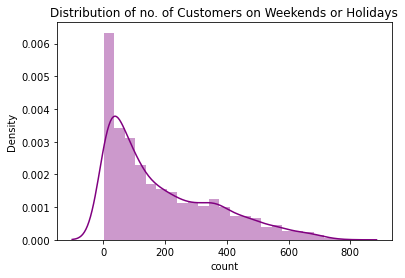

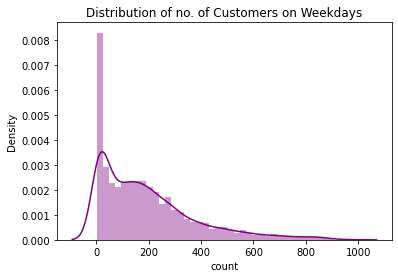

In [67]:
#  distribution of data 
sns.distplot(work1_cnt,color='purple')
plt.title('Distribution of no. of Customers on Weekends or Holidays')
plt.show()

sns.distplot(work2_cnt,color='purple')
plt.title('Distribution of no. of Customers on Weekdays')
plt.show()

In [68]:
work1['count'].mean()

188.50662061024755

In [69]:
# degree of freedom
dof = len(work1) + len(work2) - 2
dof

10884

In [72]:
work2.mean() - work1.mean()

count    4.505252
dtype: float64

In [73]:
Tstat,pvalue = stats.ttest_ind(work1['count'],work2['count'])
print(f'T Statistics and P Value of T Test is {Tstat} and {pvalue}.')

T Statistics and P Value of T Test is 1.2096277376026694 and 0.22644804226361348.


*__From the above results data we can see the P Value is greater than alpha value(0.05), Hence we fail to reject null hypothesis..__*


## Anova Test
### Anova Test to find out No. of cycles rented similar or different in different seasons o r not.

Null Hypothesis: No. of cycles rented are similar in all the seasons.

Altenate Hypothesis: No. of cycles rented similar or different in different seasons

In [74]:
spring = yulu[yulu['season']=='spring']
spring = spring['count']
summer=  yulu[yulu['season']=='summer']
summer = summer['count']
fall =  yulu[yulu['season']=='fall']
fall = fall['count']
winter =  yulu[yulu['season']=='winter']
winter = winter['count']

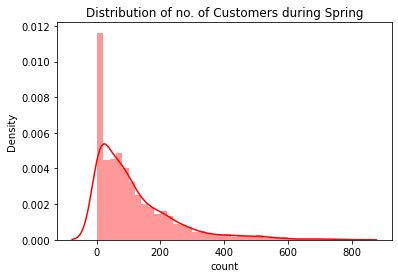

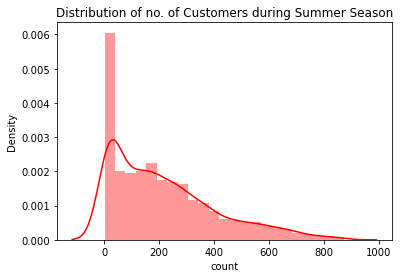

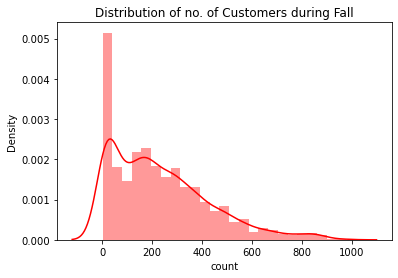

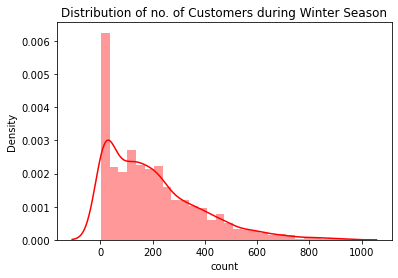

In [76]:
sns.distplot(spring,color='red')
plt.title('Distribution of no. of Customers during Spring')
plt.show()

sns.distplot(summer,color='red')
plt.title('Distribution of no. of Customers during Summer Season')
plt.show()

sns.distplot(fall,color='red')
plt.title('Distribution of no. of Customers during Fall')
plt.show()

sns.distplot(winter,color='red')
plt.title('Distribution of no. of Customers during Winter Season')
plt.show()

In [77]:
f_stat,pvalue = f_oneway(spring,summer,fall,winter)

In [79]:
print(f'F Statistic and P value of This ANOVA test comes out as {f_stat} and {pvalue}')

F Statistic and P value of This ANOVA test comes out as 236.94671081032106 and 6.164843386499654e-149


*__From the above ANOVA test case, we conclude that that p value is less than the alpha value(0.5). Hence, we fail to accept null hypothesis.__*

### ANOVA Test on No. of cycles rented similar or different in different weather or not

Null Hypothesis: No. of cycles rented similar in every weather.

Altenate Hypothesis: No. of cycles rented similar or different in different weather.

In [80]:
wthr1 = yulu[yulu['weather']=='clear clouds']['count']
wthr2 = yulu[yulu['weather']=='misty']['count']
wthr3 = yulu[yulu['weather']=='light snowy']['count']
wthr4 = yulu[yulu['weather']=='heavy rain']['count']

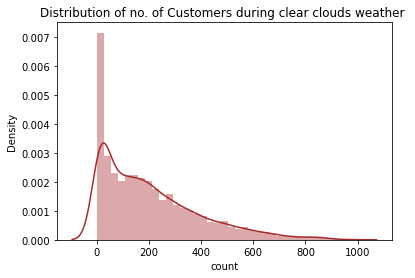

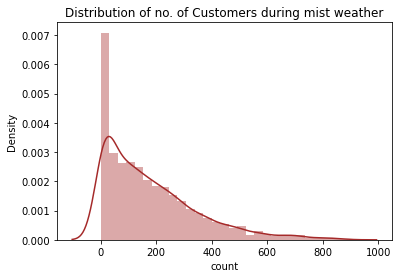

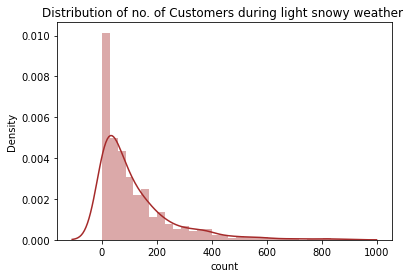

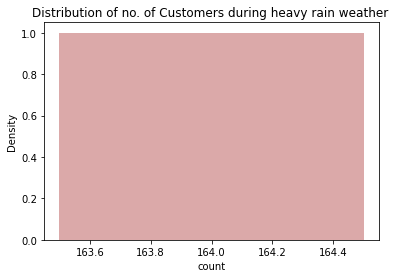

In [81]:
sns.distplot(wthr1,color='brown')
plt.title('Distribution of no. of Customers during clear clouds weather ')
plt.show()

sns.distplot(wthr2,color='brown')
plt.title('Distribution of no. of Customers during mist weather')
plt.show()

sns.distplot(wthr3,color='brown')
plt.title('Distribution of no. of Customers during light snowy weather ')
plt.show()

sns.distplot(wthr4,color='brown')
plt.title('Distribution of no. of Customers during heavy rain weather ')
plt.show()

In [ ]:
f_stat,pvalue = f_oneway(wthr1, wthr2, wthr3,wthr4)

In [ ]:
print(f'FStatistics and P value of the above ANOVA test are {f_stat} and {pvalue}')

*__From the above ANOVA test, we conclude that, p value is less than the alpha value(0.05). Hense, we fail to accept the null hypothesis.__*

## Chi-Square Test
### Chi-square test to check if Weather is dependent on the season or not.

Null Hypothesis: Weather and season are dependent.

Alternate Hypothesis: Weather and season are dependent are not dependent.

In [82]:
seas = pd.crosstab(yulu.weather,yulu.season,values=yulu['count'],aggfunc=sum)
seas


season,fall,spring,summer,winter
weather,,,,
clear clouds,470116.0,223009.0,426350.0,356588.0
heavy rain,NaN,164.0,NaN,NaN
light snowy,31160.0,12919.0,27755.0,30255.0
misty,139386.0,76406.0,134177.0,157191.0


In [83]:
seas.drop(seas.index[[1]],inplace=True)
seas

season,fall,spring,summer,winter
weather,,,,
clear clouds,470116.0,223009.0,426350.0,356588.0
light snowy,31160.0,12919.0,27755.0,30255.0
misty,139386.0,76406.0,134177.0,157191.0


In [84]:
chi_stat,p_value,dof,expected= stats.chi2_contingency(seas)

In [85]:
print(f'Statistics and P Value of above Chi-square Test is {chi_stat} and {p_value}.')

Statistics and P Value of above Chi-square Test is 10838.372332480216 and 0.0.


*__From the above Chi Square test, we conclude that P value is less than the alpha value(0.05).Hence, we fail to accept the Null Hypothesis.__*

# Insights


1)Count of customers differ in every season.


2)The Chi-squared test shows that weather is not dependent on seasons.


3)In every season, registered customers are more than double than the casual customers except for rainy season.


4)Maximum electric cycle renting can be seen on clear cloudy weather.


5)Demand for Yulu vehicles in working day is not equal to non-working day.


6)Demand for Yulu Vehicle is not similar in different weathers.


7)Casual and Registered customers follows the same trend.


8)The peak of customers can be seen during June to July in both the years.


9)The trend of customers on workingdays and holidays drastically increases from the Jan till June and falls after Oct.


10) Most Outliers can be seen in Casual and Registered Customers.


11) No Outliers can be seen in Humidity and Temprature.

# Recommendations

1) As demand for Yulu Cycles during the end and the start of the years are less, Yulu should provide some discounts in order to kick in the demands.


2) Rainy season observes the less no. of customers, so Yulu should focus on its statergy to attract more customers during that weather.


3) During clear cloud weather, Yulu should gift its customers some rewards against last month records on clear cloud weather.


4) During holidays and weekends, Yulu should focus on attracting more customers by rewarding then if they use vehicles for more than the mean value of the distance of the weekdays.


5) During June to September, Yulu should significantly increase the charge as these months observes the most no. of customers merely equal in each month.


6) Yulu should put more efforts on attracting casual customers to become more regular. 

# Submitted by:
## Noohi Naaz